In [27]:
from datetime import datetime
import backtrader as bt
from backtrader.indicators import SMA
from GetData import getData
import numpy as np
import matplotlib as plt

In [28]:
%matplotlib inline

In [29]:
#date = '2022-05-16'
symbol = 'googl'
interval = '1d'
period = '10y'

In [30]:
getdata = getData()
rawData = getdata.getHistoryYfinance(symbol=symbol, interval=interval, period=period)

[*********************100%***********************]  1 of 1 completed


In [31]:
rawData.count()

Open         2517
High         2517
Low          2517
Close        2517
Adj Close    2517
Volume       2517
dtype: int64

In [32]:
class SmaCross(bt.Strategy):
    # list of parameters which are configurable for the strategy
    params = dict(
        pfast=10,  # period for the fast moving average
        pslow=30   # period for the slow moving average
    )

    def __init__(self):
        sma1 = bt.ind.SMA(period=self.p.pfast)  # fast moving average
        sma2 = bt.ind.SMA(period=self.p.pslow)  # slow moving average
        self.crossover = bt.ind.CrossOver(sma1, sma2)  # crossover signal

    def next(self):
        if not self.position:  # not in the market
            if self.crossover > 0:  # if fast crosses slow to the upside
                self.buy()  # enter long

        elif self.crossover < 0:  # in the market & cross to the downside
            self.close()  # close long position


In [33]:
cerebro = bt.Cerebro()  # create a "Cerebro" engine instance

# Create a data feed
data = bt.feeds.PandasData(dataname=rawData)

cerebro.adddata(data)  # Add the data feed

cerebro.addstrategy(SmaCross)  # Add the trading strategy
cerebro.run()  # run it all
  # and plot it with a single command

In [34]:

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['figure.figsize']=[18, 16]
plt.rcParams['figure.dpi']=200
plt.rcParams['figure.facecolor']='w'
plt.rcParams['figure.edgecolor']='k'
#cerebro.plot(height= 30, iplot= False)

In [35]:
cerebro.broker.getvalue()

10896.158782958984

In [36]:
class SmaCross_A(bt.Strategy):
    
    # list of parameters which are configurable for the strategy
    params = dict(
        pfast=70,  # period for the fast moving average - Default 10
        pslow=200   # period for the slow moving average - Default 30
    )

    def __init__(self):
        sma1 = bt.ind.SMA(period=self.p.pfast)  # fast moving average
        self.sma2 = bt.ind.SMA(period=self.p.pslow)  # slow moving average
        self.sma = 0 
        
        #self.TA_fastSMA = bt.SMA(self.data.Close,3)  # slow moving average
        self.crossover = bt.ind.CrossOver(sma1, self.sma2)  # crossover signal            

    def next(self):
        if self.crossover > 0.0 and (self.sma * 1.0001) < self.sma2[0]:  # cross upwards
            if self.position:
                print('CLOSE SHORT , %.2f' % self.data.close[0])
                self.close()

            print('BUY CREATE , %.2f' % self.data.close[0])
            self.buy()

        elif self.crossover < 0.0 and (self.sma) > self.sma2[0]:
            if self.position:
                print('CLOSE LONG , %.2f' % self.data.close[0])
                self.close()

#            if not self.p.onlylong:
            print('SELL CREATE , %.2f' % self.data.close[0])
            self.sell()

        self.sma = self.sma2[0] 



In [37]:
cerebro = bt.Cerebro()  # create a "Cerebro" engine instance

# Create a data feed
data = bt.feeds.PandasData(dataname=rawData)

cerebro.adddata(data)  # Add the data feed

cerebro.addstrategy(SmaCross_A)  # Add the trading strategy
cerebro.run()  # run it all
  # and plot it with a single command

SELL CREATE , 543.76
CLOSE SHORT , 796.59
BUY CREATE , 796.59
CLOSE LONG , 1078.08
SELL CREATE , 1078.08
CLOSE SHORT , 1226.53
BUY CREATE , 1226.53
CLOSE SHORT , 1418.05
BUY CREATE , 1418.05


In [38]:
cerebro.broker.getvalue()

10758.669860839844

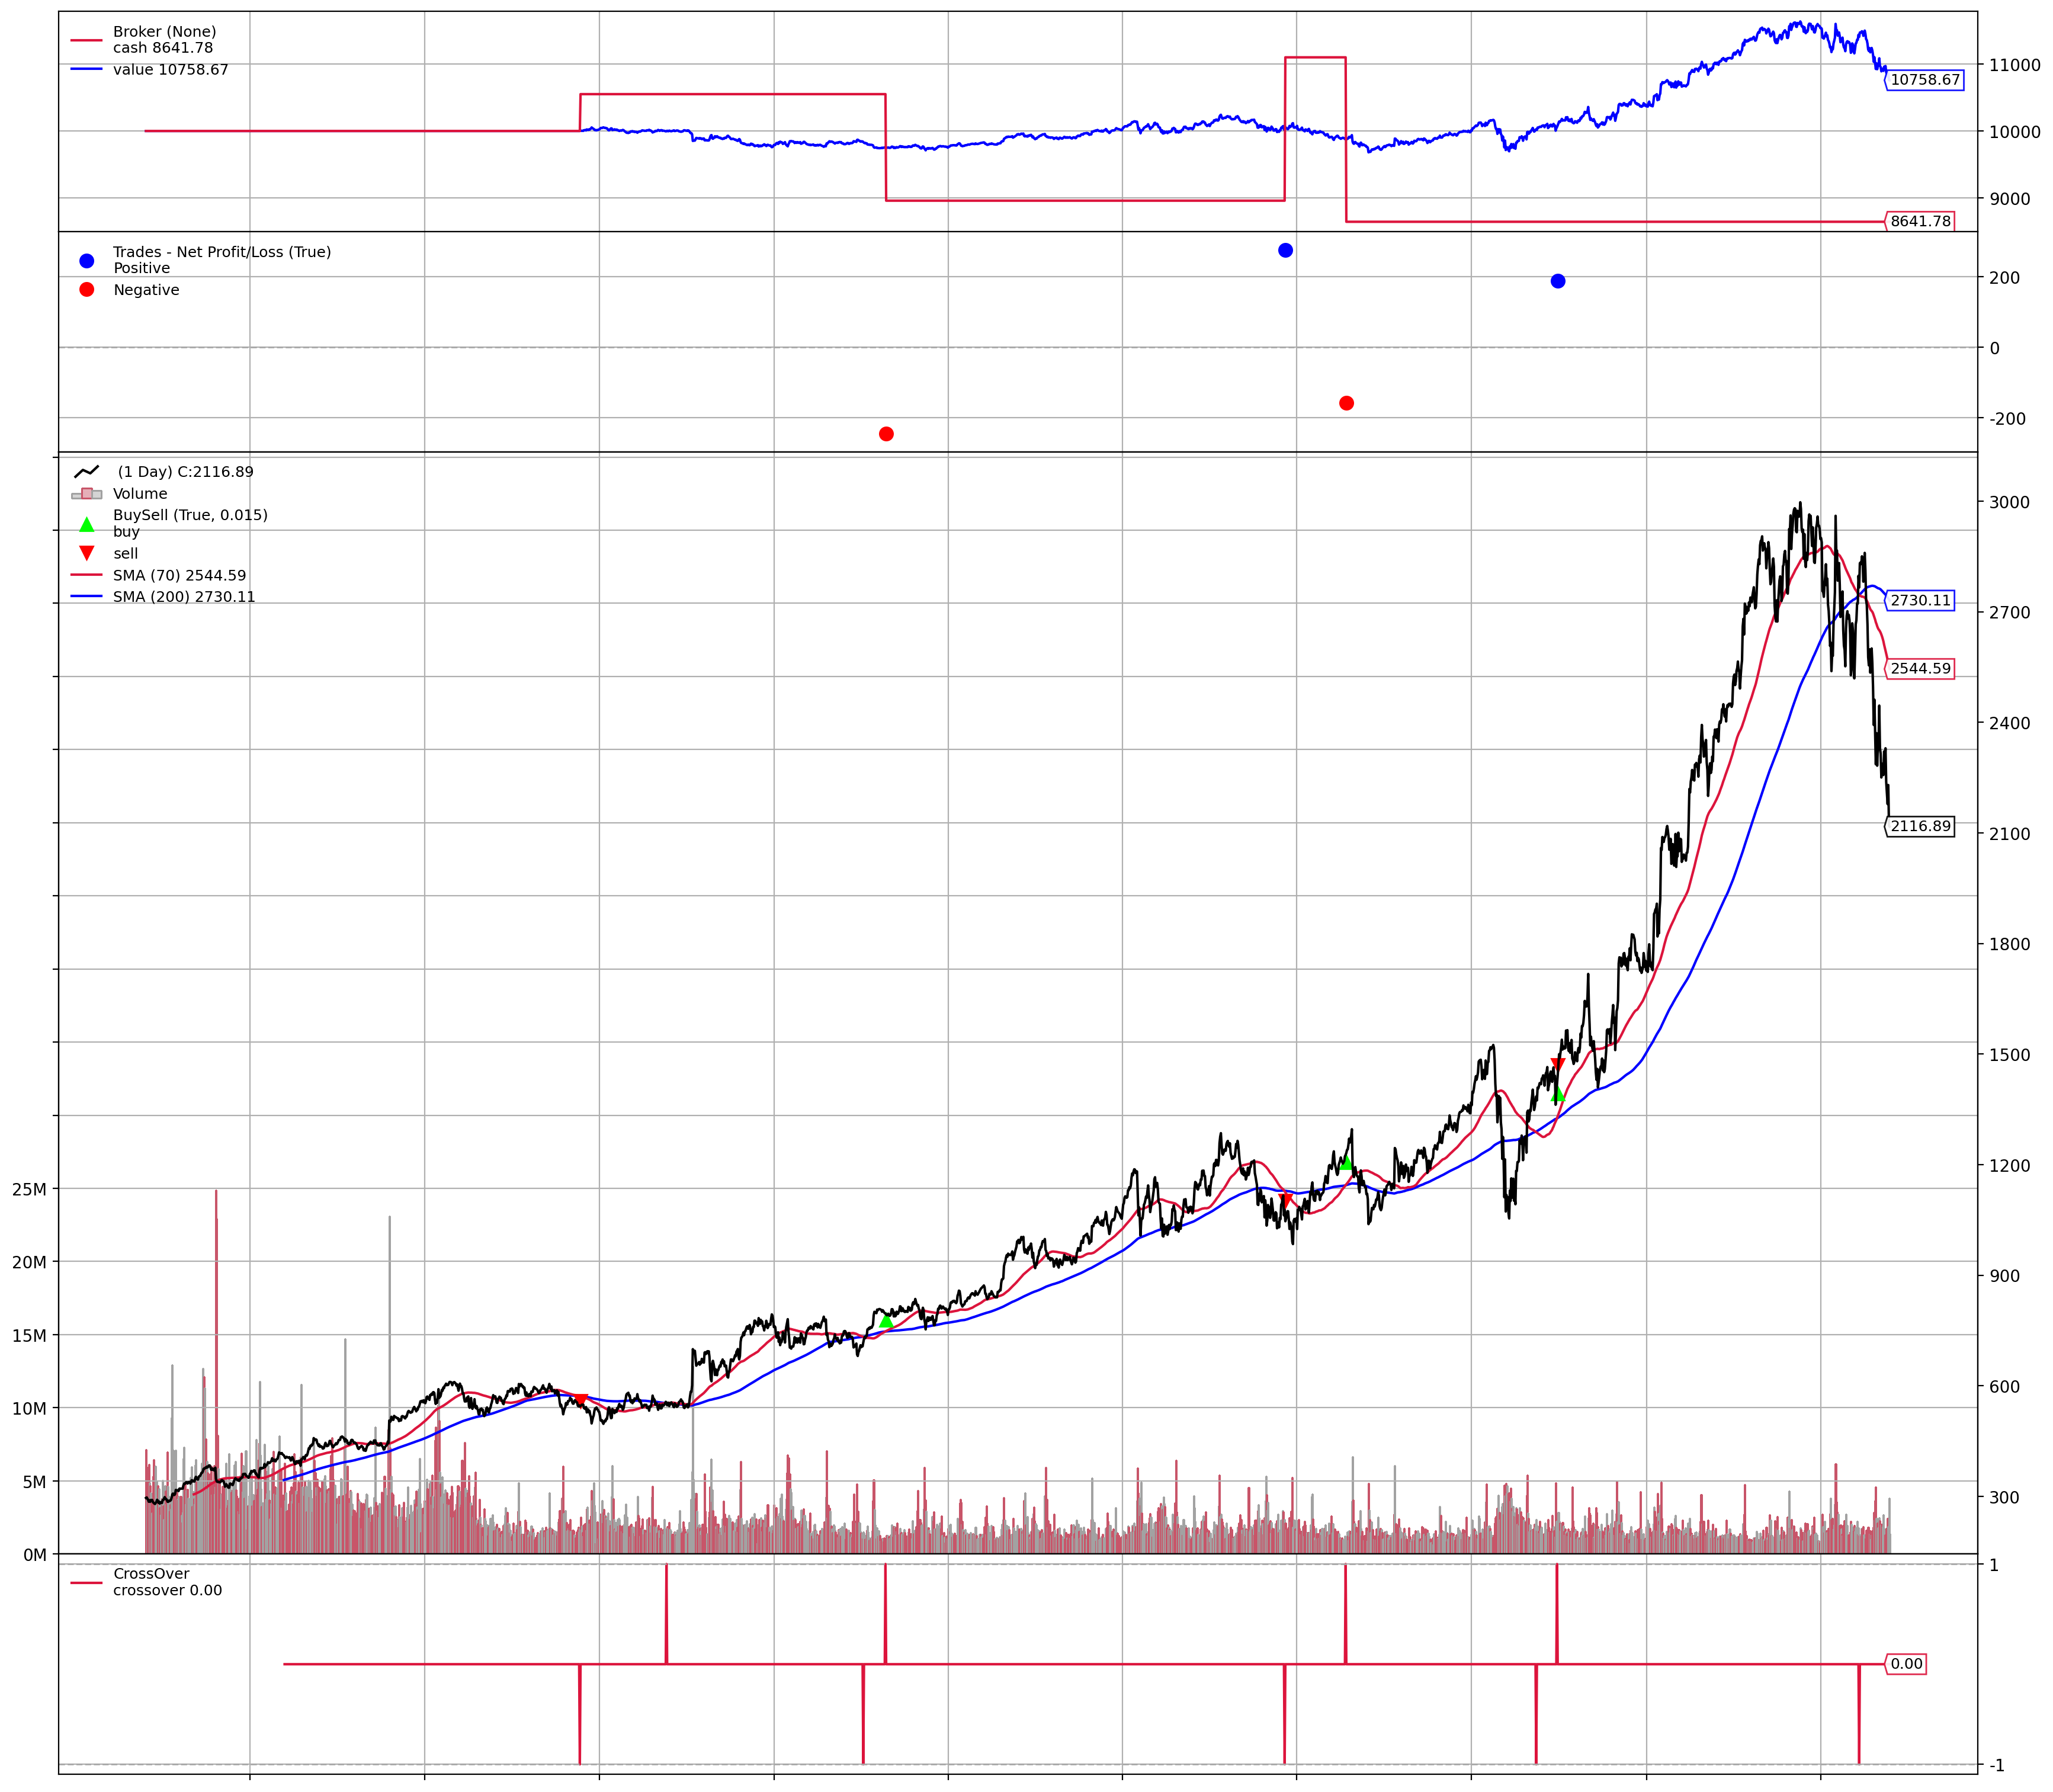

[[<Figure size 3600x3200 with 5 Axes>]]

In [39]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['figure.figsize']=[18, 16]
plt.rcParams['figure.dpi']=200
plt.rcParams['figure.facecolor']='w'
plt.rcParams['figure.edgecolor']='k'
#cerebro.plot(height= 30, iplot= False)
cerebro.plot(iplot= False)